Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Support Vector Machines with Radial Basis Function Kernel 

1855 samples
  18 predictor
   2 classes: 'Normal', 'Reckless' 

Pre-processing: centered (18), scaled (18) 
Resampling: Cross-Validated (3 fold) 
Summary of sample sizes: 1237, 1237, 1236 
Resampling results across tuning parameters:

  C     Accuracy   Kappa    
  0.25  0.9660421  0.9320476
  0.50  0.9671208  0.9341942
  1.00  0.9655027  0.9309350
  2.00  0.9649651  0.9298461
  4.00  0.9660438  0.9320131

Tuning parameter 'sigma' was held constant at a value of 0.3424928
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were sigma = 0.3424928 and C = 0.5.

Confusion Matrix and Statistics

          Reference
Prediction Normal Reckless
  Normal      398       12
  Reckless     15      369
                                          
               Accuracy : 0.966           
                 95% CI : (0.9509, 0.9775)
    No Information Rate : 0.5202          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9319          
                                          
 Mcnemar's Test P-Value : 0.7003          
                                          
            Sensitivity : 0.9637          
            Specificity : 0.9685          
         Pos Pred Value : 0.9707          
         Neg Pred Value : 0.9609          
             Prevalence : 0.5202          
         Detection Rate : 0.5013          
   Detection Prevalence : 0.5164          
      Balanced Accuracy : 0.9661          
                                          
       'Positive' Class : Normal          
      

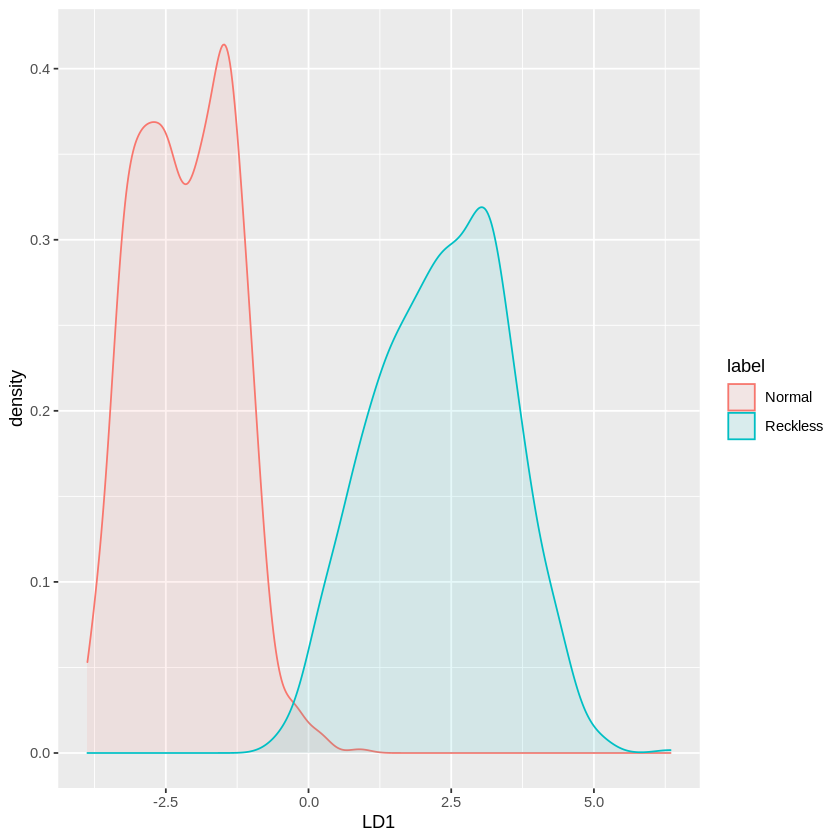

In [4]:
#Need runtime environment for R for this notebook
install.packages('caret')
install.packages('gridExtra')
install.packages('corrplot')
install.packages('zoo')
install.packages('kernlab')
install.packages('e1071')
library('MASS')
library('caret')

library('ggplot2') # visualization
library('scales') # visualization
library('plyr'); library('dplyr')
library('tidyr') # data manipulation
library('gridExtra')
library('corrplot')

library('stringr')
library('data.table')
library('zoo')

#plant random seed
set.seed(2021)
select <- dplyr::select
options(digits.secs=6)

#Add correct dataset here, make sure the path is set correct such that it can find the data set
df <- fread('trimmed_acc_gyro_data.csv', stringsAsFactors=FALSE)
df$label <- as.factor(df$label)

#Create a partition of dataset, training set with 70% and test set with 30 % of data, randomly chosen
intrain <- createDataPartition(y=df$label, p=0.7, list=FALSE)

df_train <- df[intrain,]
df_test <- df[-intrain,]

r       <- lda(formula = label ~ ., data = df_train)
plda    <- suppressWarnings(predict(object = r,  newdata = df_train))

dataset <- data.frame(label = df_train[,"label"], lda = plda$x)
ggplot(dataset, aes(x=LD1, colour = label, fill = label)) + geom_density(alpha = 0.1)

trControl <- trainControl(method = "cv",  number=3, verboseIter = FALSE)

# Training a SVM radial from caret library, on label field (Normal/Reckless), All parameters are standard
# Add all features from data set you want to include
SVMRadial_fit <- caret::train(label ~  std_acc_x +
                               std_acc_y +
                               std_acc_z + 
                               mean_acc_x +        
                               mean_acc_y +
                               mean_acc_z +
                               range_acc_x + 
                               range_acc_y + 
                               range_acc_z +
                               std_gyro_x +
                               std_gyro_y +
                               std_gyro_z +
                               mean_gyro_x +
                               mean_gyro_y +
                               mean_gyro_z +
                               range_gyro_x +
                               range_gyro_y +
                               range_gyro_z, 
                data=df_train, 
                method = "svmRadial",
                preProcess = c("center", "scale"),
                tuneLength = 5, 
                trControl = trControl,
                metric = 'Accuracy')
#prints svm radial
SVMRadial_fit

#test the svm radial trained with training set, against the test set.
p_SVMRad = predict(SVMRadial_fit, df_test, type="raw")

#Create confusion matrix based on Normal/Reckless to get desired result parameters.
confusion_matrix = confusionMatrix(p_SVMRad, df_test$label)
print(confusion_matrix)

#Print results in nice format
print(paste('Accuracy: ' , accuracy <- confusion_matrix$overall['Accuracy'], sep = ""))
tn <- confusion_matrix$table[1]
fp <- confusion_matrix$table[2]
fn <- confusion_matrix$table[3]
tp <- confusion_matrix$table[4]

print(paste('Precision: ', precision <- tp / (tp + fp), sep = ""))
print(paste('Recall: ' , recall <- tp / (tp + fn), sep = ""))
print(paste('F1-score: ' , f1_score <- 2 / ((1/precision) + (1/recall)), sep = ""))
print(fpr <- fp / (fp + tn))


